<a href="https://colab.research.google.com/github/jaidonlybbert/EEP596/blob/main/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1

In [1]:
import torch
import numpy as np

### (a) Tensor

Construct an uninitialized 4x4 matrix:





In [2]:
# todo
x = torch.empty(4,4)
print(x)

tensor([[3.7930e-35, 0.0000e+00, 3.3631e-44, 0.0000e+00],
        [       nan, 0.0000e+00, 1.1578e+27, 1.1362e+30],
        [7.1547e+22, 4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 0.0000e+00, 0.0000e+00]])


Construct a randomly initialized 3x3 matrix from a uniform distribution on the interval [0, 10)

In [3]:
# todo
x = torch.rand(3,3) * 10
print(x)

tensor([[2.2482e+00, 2.6038e+00, 9.7212e+00],
        [6.5872e+00, 1.9515e-03, 6.9806e+00],
        [9.1852e+00, 6.8857e+00, 5.1637e+00]])


Construct a 2x2 matrix filled zeros with data type float32:

In [4]:
# todo
from torch import float32


x = torch.zeros(2,2, dtype=float32)
print(x)

tensor([[0., 0.],
        [0., 0.]])


Construct a 2x2 matrix from the normal distribution with zero mean and one std with the same shape as x. 

y's data type should be float32. 

Print the size of x and y.

In [5]:
# todo
mean = torch.zeros_like(x)
y = torch.normal(mean, x)
print(y)
# todo: print the size of x and y
print(x.shape)
print(y.shape)

tensor([[0., 0.],
        [0., 0.]])
torch.Size([2, 2])
torch.Size([2, 2])


### (b) Operations

Addition: Print x + y

In [6]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)
print(x)
print(y)
# todo
print(x+y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[4., 5.],
        [6., 7.]])
tensor([[ 5.,  7.],
        [ 9., 11.]])


Addition: add y and x inplace (modify y)

In [7]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)

# todo: adds x to y
y.add_(x)

print(y)

tensor([[ 5.,  7.],
        [ 9., 11.]])


Indexing

In this part, you will use indexing techniques to access part of data store in tensor **x**.
x is a 3x3x3 matrix.

For simplicity, we let (a, b, c) represents the a-th in the first axis, b-th in the second axis and c-th in the third axis, a, b and c start from 0, 

e.g get x at (0, 1, 1) is to get the first in the first axis, second in the second axis and second in the third axis of x, which returns 5. 

We also let getting x at (0:2, 1, 1) mean get the first two rows in the first axis, second in the second axis and second in the third axis.

Hint: You should use standard NumPy-like indexing.


In [8]:
x = torch.arange(1, 28, dtype=torch.int32).reshape(3, 3, 3)
print(x)
# Example: get (0, 1, 1) of x
print(x[0, 1, 1])
# Example: get (0:2, 1, 1) of x
print(x[0:2, 1, 1])

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]], dtype=torch.int32)
tensor(5, dtype=torch.int32)
tensor([ 5, 14], dtype=torch.int32)


In [9]:
# todo: get (1, 2, 1) of x
print(x[1, 2, 1])

# todo: get (0, 1:3, 1) of x
print(x[0, 1:3, 1])

# todo: get (1:3, 0:3, 1:3) of x
print(x[1:3, 0:3, 1:3])


tensor(17, dtype=torch.int32)
tensor([5, 8], dtype=torch.int32)
tensor([[[11, 12],
         [14, 15],
         [17, 18]],

        [[20, 21],
         [23, 24],
         [26, 27]]], dtype=torch.int32)


Resizing

In [10]:
A = torch.arange(12)

# todo: resize A to 3x4 using view
print(A.view(3, 4))

# todo: resize A to 4x3 using reshape
print(A.view(4, 3))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


Question: what is the difference between view and reshape of a tensor?

A view shares the same underlying data in memory as the original matrix, and can only operate on tensors store in contiguous memory

A reshape can operate on tensors stored in contiguous or non-contiguous memory, and may return a copy of the tensor stored in physically separate memory.

## Problem 2

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from the [google drive link](https://drive.google.com/file/d/13BJmpfohMGthH9gGRYgxMyBk3Y2J8vE8/view?usp=sharing) and put into your Google Drive.
Mount your Google Drive to this notebook.

In [11]:
# Show matplotlib graphs in your notebook
%matplotlib inline

In [12]:
# Mount your Google Drive to this notebook.
from google.colab import drive
drive.mount('/content/gdrive')
!unzip "/content/gdrive/MyDrive/EEP596/mnist.zip" -d "/content"

Mounted at /content/gdrive
Archive:  /content/gdrive/MyDrive/EEP596/mnist.zip
  inflating: /content/mnist.mat      


Load MNIST dataset from your Google Drive. 

Different from HW1, we downsample the data from 28x28 to 14x14.
The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

In [13]:
from scipy.io import loadmat
import torch
import torchvision.transforms as T


mnist = loadmat('/content/mnist.mat') # change the file path according to the path where you put mnist.mat on your Google Drive.

# convert data to torch, normalize and reshape
data = torch.reshape(torch.from_numpy(mnist['traindata']).to(torch.float)/255.0 - 0.5, (mnist['traindata'].shape[0], 1, 28, 28))
testdata = torch.reshape(torch.from_numpy(mnist['testdata']).to(torch.float)/255.0 - 0.5, (mnist['testdata'].shape[0], 1, 28, 28))

trainlabels = torch.from_numpy(mnist['trainlabels'].ravel()[:50000])
validlabels = torch.from_numpy(mnist['trainlabels'].ravel()[50000:])

resize = T.Resize((14,14))
data = resize(data)
testdata = resize(testdata)
traindata = data[:50000]
validdata = data[50000:]


print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)

torch.Size([50000, 1, 14, 14])
torch.Size([50000])
torch.Size([10000, 1, 14, 14])
torch.Size([10000])
torch.Size([10000, 1, 14, 14])


In [14]:
from torch.utils.data import TensorDataset, DataLoader

mnist_train = TensorDataset(traindata, trainlabels)
mnist_valid = TensorDataset(validdata, validlabels)
mnist_valid_loader = DataLoader(mnist_valid, batch_size=1)



Visualize an image with label.

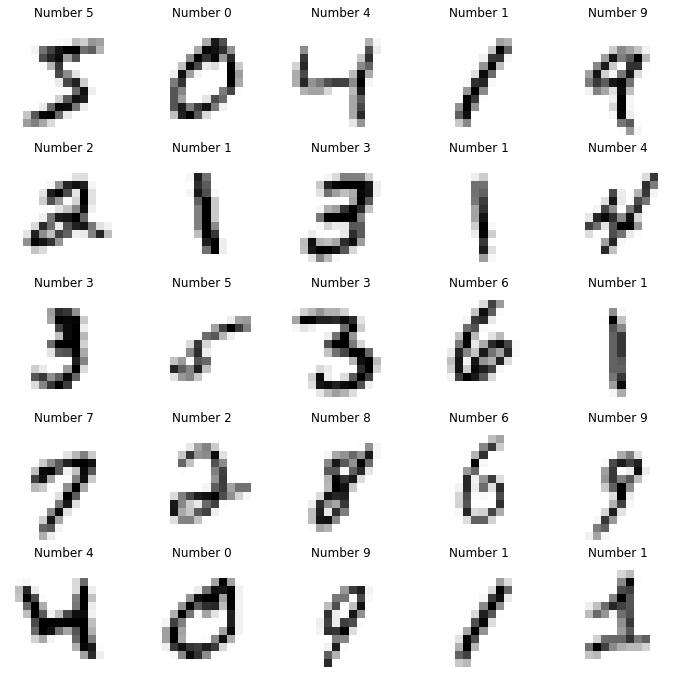

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow((mnist_train[i][0] + 0.5 ).reshape((14, 14)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

(b) Multilayer Perceptron (MLP)

Use MLP to achieve image classification.

Define the following MLP using PyTorch to do image classification on MNIST dataset according to the below figure:
Number of hidden layers: 3
Number of neurons in the layers: [100, 50, 20]
Activation functions: ReLU()
Dropout for all hidden layers: 30%
Output layer + softmax


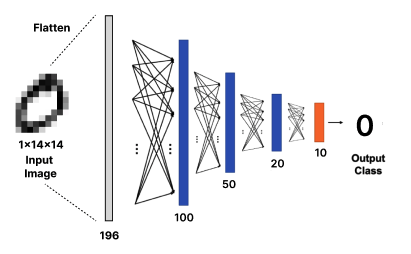

To feed the data into the MLP, each image with dim of $1 \times 14 \times 14$ needs to be flatten into a vector with dim of $196.

Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU. Let's first define our device as the first visible cuda device if we have CUDA available.

**Note**: remember to keep the logs of training the different models.

In [16]:
# use GPU to train if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [17]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    # TODO: define your MLP
    self.fc1 = nn.Linear(196, 100)
    self.fc2 = nn.Linear(100, 50)
    self.fc3 = nn.Linear(50, 20)

    self.fc4 = nn.Linear(20, 10)

    self.dropout = nn.Dropout(0.30)

    

  def forward(self, x):
    # TODO: define your forward function
    x = x.view(196)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = F.softmax(F.relu(self.fc4(x)), dim=0)
    return x


In [18]:
# TODO: write your training code
def train(model, loss_func, optimizer):
  # input = mnist_train[0][0]
  # mlp = MLP()
  # out = mlp(input)
  # print(out)
  train_dataloader = DataLoader(mnist_train, batch_size=1, shuffle=True)

  for batch, (X, train_label) in enumerate(train_dataloader):
    pred = model(X)

    y = torch.zeros_like(pred)
    y[train_label[0].item()] = 1.0

    loss = loss_func(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 1000 == 0:
      print(f"Loss: {loss.item()}")

# TODO: write your testing code
def test(dataloader, model, loss_func):

  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, train_label in dataloader:
      pred = model(X)
      y = torch.zeros_like(pred)
      y[train_label[0].item()] = 1.0
      test_loss += loss_func(pred, y)
      correct += (pred.argmax() == train_label[0].item()).type(torch.float).sum().item()
  
  test_loss /= num_batches
  correct /= size

  print(f"Accuracy: {100*correct:.1f}% \nAvg Loss: {test_loss:8f}")
  


In [19]:
mlp = MLP().to(device)  # operate on GPU

Define a loss function and optimizer.

In [20]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network. 

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

In [21]:
n_epoch = 10
# todo: use your train() to train the model
train(mlp, criterion, optimizer)

Loss: 2.3064005374908447
Loss: 2.3025851249694824
Loss: 2.401323080062866
Loss: 2.4373419284820557
Loss: 2.4090917110443115
Loss: 2.430689811706543
Loss: 1.8000473976135254
Loss: 1.4611610174179077
Loss: 2.4171342849731445
Loss: 2.377772331237793
Loss: 1.6295336484909058
Loss: 1.7286931276321411
Loss: 2.444235324859619
Loss: 2.048018217086792
Loss: 2.3310129642486572
Loss: 1.9467086791992188
Loss: 1.4611501693725586
Loss: 1.8023180961608887
Loss: 1.4615199565887451
Loss: 2.428440570831299
Loss: 2.4481418132781982
Loss: 1.4611834287643433
Loss: 1.4611501693725586
Loss: 1.4616243839263916
Loss: 1.4611501693725586
Loss: 1.4611501693725586
Loss: 1.4621164798736572
Loss: 2.461148500442505
Loss: 1.552573800086975
Loss: 1.4611537456512451
Loss: 1.7697750329971313
Loss: 1.4611502885818481
Loss: 1.4611501693725586
Loss: 1.4611501693725586
Loss: 1.4611501693725586
Loss: 1.5266869068145752
Loss: 1.4611501693725586
Loss: 1.4611501693725586
Loss: 2.4603912830352783
Loss: 1.6055668592453003
Loss: 1.

Save the trained model. 
See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.

In [22]:
PATH = '/content/gdrive/MyDrive/EEP596/mlp_mnist.pth'
torch.save(mlp.state_dict(), PATH)

Load back in our saved model. (Note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so)



In [23]:
mlp = MLP().to(device)
mlp.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Evaluate the classfication performance on the testing set.

In [24]:
print(mlp)
# todo: use your test() to test your MLP on val set
test(mnist_valid_loader, mlp, criterion)

MLP(
  (fc1): Linear(in_features=196, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)
Accuracy: 65.8% 
Avg Loss: 1.786696


(c) Convolution Neural Network (CNN)

Built a LeNet-5 using PyTorch to do image classification. Develop the CNN from the PyTorch NN tutorial introduced in class. 

Note: 
1. The input image dimension shown in the figure below is different from the one we have in this problem.
2. Use kernel size=3 for both convolutions (Original LeNet-5 uses kernel size=5 as shown in the Fig.3 of HW2.pdf)


In [25]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.cv1 = nn.Conv2d(1, 6, 3)
    self.cv2 = nn.Conv2d(6, 16, 3)

    self.fc1 = nn.Linear(16 * 2 * 2, 50)
    self.fc2 = nn.Linear(50, 30)
    self.fc3 = nn.Linear(30, 10)

    self.dropout = nn.Dropout(0.30)

  def forward(self, x):
    # TODO: define your forward function
    x = F.max_pool2d(F.relu(self.cv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.cv2(x)), (2, 2))

    x = x.view(64)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = F.softmax(self.fc3(x), dim=0)

    return x

cnn_mnist = CNN().to(device)  # operate on GPU

In [26]:
# todo: similar to MLP, train your CNN model

train_dataloader = DataLoader(mnist_train, batch_size=1, shuffle=True)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_mnist.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

for batch, (X, train_label) in enumerate(train_dataloader):
  pred = cnn_mnist(X)

  y = torch.zeros_like(pred)
  y[train_label[0].item()] = 1.0

  loss = loss_func(pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if batch % 1000 == 0:
    print(f"Loss: {loss.item()}")

Loss: 2.2984395027160645
Loss: 1.5953093767166138
Loss: 1.4620829820632935
Loss: 2.275404930114746
Loss: 2.292177200317383
Loss: 2.427410364151001
Loss: 1.4618432521820068
Loss: 1.5796866416931152
Loss: 1.5402779579162598
Loss: 1.6762442588806152
Loss: 2.454103469848633
Loss: 1.4624884128570557
Loss: 2.4580628871917725
Loss: 2.4039323329925537
Loss: 2.4213337898254395
Loss: 1.4611506462097168
Loss: 1.4611501693725586
Loss: 1.4614596366882324
Loss: 2.2901370525360107
Loss: 1.4965109825134277
Loss: 1.461782455444336
Loss: 1.4612284898757935
Loss: 1.4927594661712646
Loss: 1.462830662727356
Loss: 1.4616118669509888
Loss: 1.461180567741394
Loss: 1.4615042209625244
Loss: 1.4611501693725586
Loss: 1.461155652999878
Loss: 1.4611502885818481
Loss: 1.4613500833511353
Loss: 1.461155652999878
Loss: 1.4611501693725586
Loss: 1.461203694343567
Loss: 1.4611502885818481
Loss: 1.5997766256332397
Loss: 1.4611501693725586
Loss: 1.8188269138336182
Loss: 1.4611501693725586
Loss: 1.461423397064209
Loss: 1.461

In [27]:
print(cnn_mnist)
# todo: use your test() to test your CNN on val set

size = len(mnist_valid_loader.dataset)
num_batches = len(mnist_valid_loader)
test_loss, correct = 0, 0

with torch.no_grad():
  for X, train_label in mnist_valid_loader:
    pred = cnn_mnist(X)
    y = torch.zeros_like(pred)
    y[train_label[0].item()] = 1.0
    test_loss += loss_func(pred, y)
    correct += (pred.argmax() == train_label[0].item()).type(torch.float).sum().item()

test_loss /= num_batches
correct /= size

print(f"Accuracy: {100*correct:.1f}% \nAvg Loss: {test_loss:8f}")

CNN(
  (cv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (cv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)
Accuracy: 89.0% 
Avg Loss: 1.571288


## Problem 3: Image Classification by CNN

Write code to load and visualize the CIFAR-10 dataset.

CIFAR-10 dataset has the classes (listed below): ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size $3 \times 32 \times 32$, i.e. 3-channel color images of $32 \times 32$ pixels in size. 

<h4>Note:</h4>
The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms, datasets

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 
           'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar10_trainset = datasets.CIFAR10(root='./data/', train=True, download=True, transform=transform)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform)

cifar_loader = DataLoader(cifar10_trainset, batch_size=len(cifar10_trainset), shuffle=False)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=len(cifar10_testset), shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


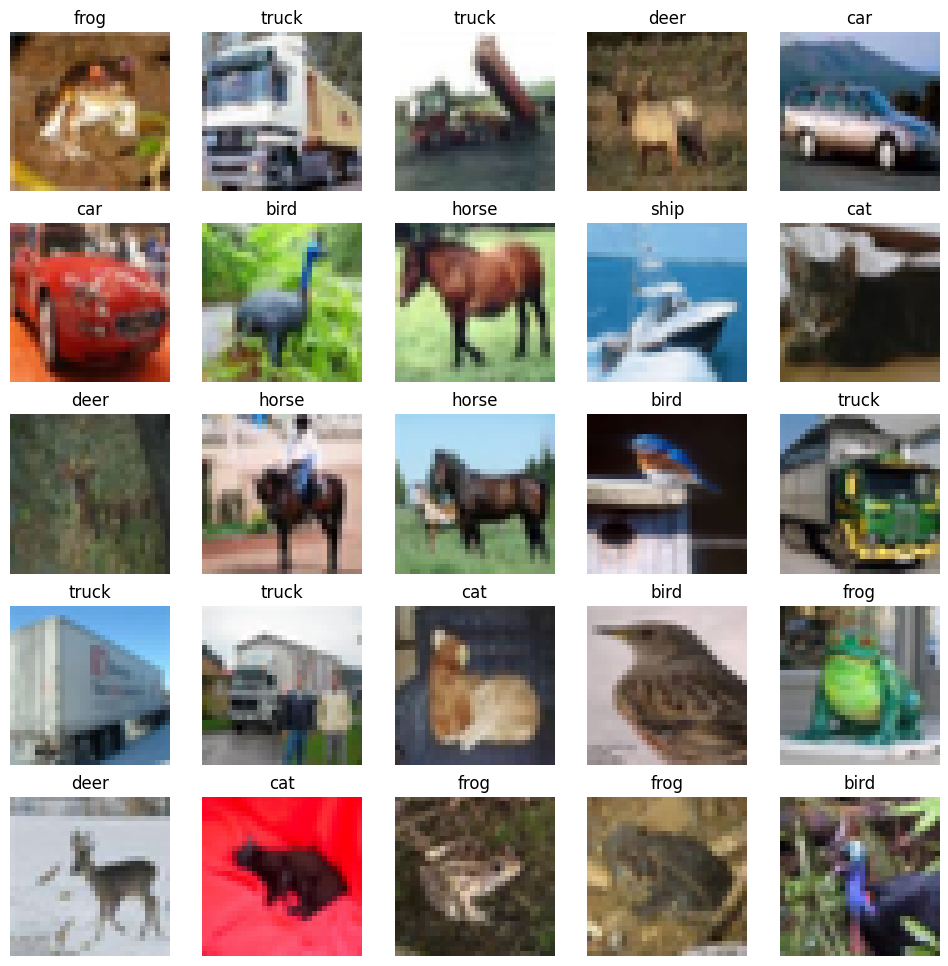

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def cifar_imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  return np.transpose(npimg, (1, 2, 0))

# TODO: visualize some samples in the CIFAR-10 dataset
fig, axs = plt.subplots(5, 5, figsize = (12, 12))

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(cifar_imshow(cifar10_trainset[i][0]))
  ax.axis('off')
  ax.set_title(f'{classes[cifar10_trainset[i][1]]}')

#### Data Augmentation

In [ ]:
from torch.utils.data import ConcatDataset

transform1 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


# Shifting: randomly shift the images up/down and left/right by within 10%.
transform2 = transforms.Compose(
    [
        transform1,
        transforms.RandomAffine(0, (0.2, 0.2))
    ])

# Rotating: randomly rotate the images by some angles.
transform3 = transforms.Compose(
    [
        transform1,
        transforms.RandomAffine(60)
    ])

# Flipping: horizontally flip the images.
transform4 = transforms.Compose(
    [
        transform1,
        transforms.RandomHorizontalFlip(1.0)
    ])

# Adding Noise: randomly add some small Gaussian noise to the images.
transform5 = transforms.Compose(
    [
        transform1,
        transforms.GaussianBlur(3)
    ]
)

transform_list = [transform1, transform2, transform3, transform4, transform5]
augmented_dataset = []
for t in transform_list:
  augmented_dataset.append(datasets.CIFAR10(root='./data/', train=True, download=True, transform=t))

cifar_train_dataset = ConcatDataset(augmented_dataset)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform1)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=128, shuffle=False)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
cuda:0


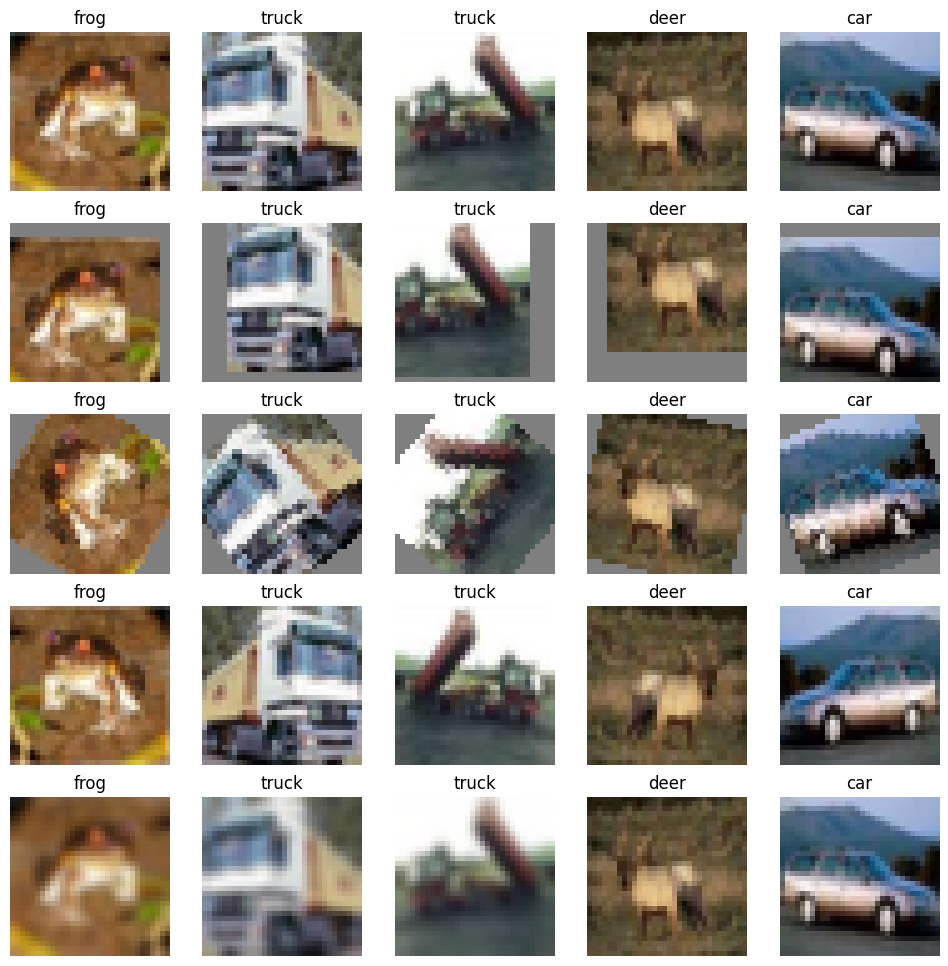

In [ ]:
# Visualize augmented data
fig, axs = plt.subplots(5, 5, figsize = (12, 12))

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(cifar_imshow(augmented_dataset[int(i/5)][i%5][0]))
  ax.axis('off')
  ax.set_title(f'{classes[augmented_dataset[int(i/5)][i%5][1]]}')

Define a CNN to do classification on CIFAR-10 dataset. You can build a CNN from the previous problem and modify it to take 3-channel images (instead of 1-channel images as it was defined).

**Note**: remember to keep the logs of training the different models.

(1) Define a CNN using PyTorch to do image classification. Develop the CNN from the previous PyTorch NN tutorial.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN1(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.cv1 = nn.Conv2d(3, 16, 3)
    self.batchnorm1 = nn.BatchNorm2d(16)
    self.cv2 = nn.Conv2d(16, 32, 3)
    self.batchnorm2 = nn.BatchNorm2d(32)
    self.cv3 = nn.Conv2d(32, 64, 3)
    self.batchnorm3 = nn.BatchNorm2d(64)
    self.cv4 = nn.Conv2d(64, 64, 2)
    self.batchnorm4 = nn.BatchNorm2d(64)
    self.cv5 = nn.Conv2d(64, 64, 2)
    self.batchnorm5 = nn.BatchNorm2d(64)

    self.fc1 = nn.Linear(256, 200)
    self.fc2 = nn.Linear(200, 128)
    self.fc3 = nn.Linear(128, 100)
    self.fc4 = nn.Linear(100, 56)
    self.fc5 = nn.Linear(56, 10)

    self.dropout = nn.Dropout(0.3)
  

  def forward(self, x):
    # TODO: define your forward function
    x = F.max_pool2d(F.relu(self.cv1(x)), 2)
    x = self.batchnorm1(x)
    x = F.max_pool2d(F.relu(self.cv2(x)), 2)
    x = self.batchnorm2(x)
    x = F.relu(self.cv3(x))
    x = self.batchnorm3(x)
    x = F.relu(self.cv4(x))
    x = self.batchnorm4(x)
    x = F.relu(self.cv5(x))
    x = self.batchnorm5(x)

    x = x.view(-1, self.num_flat_features(x))
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = self.dropout(F.relu(self.fc4(x)))
    x = F.softmax(self.fc5(x), dim=1)

    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features=1
    for s in size:
      num_features *= s
    return num_features

cnn1 = CNN1().to(device)  # operate on GPU

Define a loss function and optimizer.

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network.

In [ ]:
# todo: use your train() to train your cnn1
cifar_train_loader = DataLoader(cifar_train_dataset, batch_size=128, shuffle=False)

for batch, (X, train_label) in enumerate(cifar_train_loader):
  dev_images = X.to(device)
  dev_train_labels = train_label.to(device)
  pred = cnn1(dev_images)

  y = torch.zeros_like(pred)
  for (i, row) in enumerate(y):
    y[i][dev_train_labels[i].item()] = 1.0

  loss = criterion(pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if batch % 100 == 0:
    print(f"Loss: {loss.item()}")

Loss: 2.30177640914917
Loss: 2.1303086280822754
Loss: 2.0998847484588623
Loss: 2.0658187866210938
Loss: 2.0871496200561523
Loss: 2.1078176498413086
Loss: 2.0923094749450684
Loss: 2.116227388381958
Loss: 2.0848958492279053
Loss: 2.0543301105499268
Loss: 2.0787601470947266
Loss: 2.0929794311523438
Loss: 1.9644176959991455
Loss: 1.9615747928619385
Loss: 2.003364086151123
Loss: 2.0125513076782227
Loss: 1.9531121253967285
Loss: 2.005631923675537
Loss: 2.038991689682007
Loss: 2.026061773300171


Evaluate the classfication performance on the testing set.

In [ ]:
# todo: use your test() to test your cnn1
size = len(cifar_test_loader.dataset)
num_batches = len(cifar_test_loader)
test_loss, correct = 0, 0

with torch.no_grad():
  for batch, (X, train_label) in enumerate(cifar_test_loader):
    dev_images = X.to(device)
    dev_train_labels = train_label.to(device)
    pred = cnn1(dev_images)

    y = torch.zeros_like(pred)
    for (i, row) in enumerate(y):
      y[i][dev_train_labels[i].item()] = 1.0
      correct += (pred[i].argmax() == train_label[i].item()).type(torch.float).sum().item()

    test_loss += criterion(pred, y)

test_loss /= num_batches
correct /= size

print(f"Accuracy: {100*correct:.1f}% \nAvg Loss: {test_loss:8f}")

Accuracy: 45.5% 
Avg Loss: 2.002173


(2) Try different network parameters/configurations (at least 5 combinations). 

You should try to achieve at least **80%** accuracy on the CIFAR-10 testing set using one of your network configuration.


Performances using different configurations

todo: past your performance v.s different network configurations in a table.

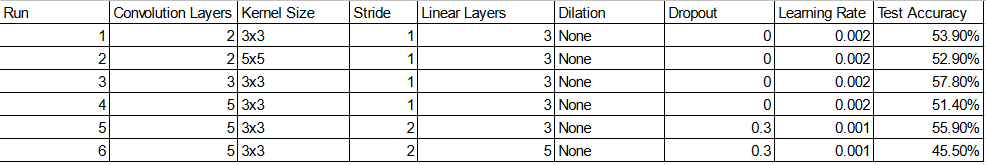

####  Discussion

(1) Which framework can achieve higher accuracy, MLP or CNN? Briefly explain the reason.

(2) Based on your experiments in Problem3, which parameter can potentially affect your performance most?



For the MNIST data set, the CNN had an accuracy of 89.0% which outperformed the MLP accuracy of 65%. The CNN allows you to use features of the image which are made up of multiple inputs (pixels) which may be grouped together, and apply filtering to those features. On the other hand, the MLP inputs are single pixels, and the spatial relationship between inputs is not well defined. In this way, the CNN allows you to use more information to classify the images, and results in greater accuracy.

I had trouble achieving the 80% accuracy target with the CIFAR-10 data set. The changes I made seemed to have little effect on the overall testing set accuracy. I did find it interesting that increasing the total number of layers from 5 to 10 actually hurt the performance by about 8%, which tells me that adding more layers is not the solution. 